#### This Project is all about Principal Component Analysis - A Dimensionality Reduction Technique.

## Table of contents
- The curse of Dimensionality.
- Introduction of Principal Component Analysis.
- Import Python Libraries
- Import Dataset
- EDA
- Split data into training and test set
- Feature Engineering
- Feature Scaling
- Logistic Regression model with all features
- Logistic Regression with PCA
- Select the right number of dimensions
- Plot explained variance ratio with the number of dimensions
- Conclusion

### The Curse of Dimensionality
Generally, real-world datasets contain thousands or millions of features to train for. This is a very time-consuming task, as it significantly slows down training. In such cases, it is very difficult to find a good solution. This problem is often referred to as the curse of Dimensionality.

The Curse of Dimensionality refers to various phenomena that arise when we analyze and organize data in high-dimensional spaces that do not occur in low-dimensional settings. The problem is that when the dimensionality increases, the volume of space increases so fast that the available data becomes sparse. The sparsity is problematic for any method that requires statistical significance.

In real-world problems. It is often possible to reduce the number of dimensions considerably. This process is called dimensionality reduction. It refers to the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. It helps to speed up training and is also extremely useful for data visualization.

The most popular dimensionality reduction technique is PCA.

## Introduction to Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a Dimensionality reduction technique that can be used to reduce a large set of feature variables into a smaller set that still contains most of the variance in the large set.

**Preserve the Variance**
- PCA first identifies the hyperplane that lies closest to the data and then projects the data onto it. Before we can project the training set onto a lower-dimensional hyperplane. We need to select the right hyperplane. The projection can be done in such a way as to preserve the maximum variance. This is the idea behind PCA.

**Principal Components**
- PCA identifies the axes that account for the maximum amount of cumulative sum of variance in the training set. These are called Principal Components. PCA assumes that the dataset is centered around the origin. Scikit-Learn's PCA classes take care of centering the data automatically.

**Projection down to Dimensions**
- Once we have identified all the principal components, we can reduce the dimensionality of the dataset to dimensions by projecting it onto the hyperplane defined by the first principal components. This ensures that the projection will preserve as much variance as possible.

# Import Python libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [49]:
df = pd.read_csv('adult.csv')

## EDA

### Check shape of dataset

In [50]:
print(df.shape)
print('We can see that there are 32561 instances and 15 attributes in the datset')

(32561, 15)
We can see that there are 32561 instances and 15 attributes in the datset


### Preview dataset

In [51]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### View summary of dataframe

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as NaN values.

### Encode ? as NaNs

In [53]:
df[df == '?' ]= np.nan

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - `workclass`, `occupation` and `native.country` contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

### Impute missing values with mode

In [55]:
for col in ['workclass','occupation','native.country']:
    df[col].fillna(df[col].mode()[0],inplace = True)

### Check again for missing values

In [56]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

In [57]:
X = df.drop(['income'],axis = 1)
y = df['income']

In [58]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Feature Engineering
 Encode categorical Variables

In [60]:
cat = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for i in cat:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

### Feature Scaling

In [61]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [62]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Logistic Regression with all features 

In [63]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Logistic Regression accuracy score with all features:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Logistic Regression accuracy score with all features:0.8218


### PCA Implementation

In [64]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

### Comment

- We can see that approximately 97.25% of variance is explained by the first 13 variables. 
- Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information. 
- So, I will drop it, train the model again and calculate the accuracy. 

### Logistic Regression with first 13 features

In [34]:
X = df.drop(['income','native.country'],axis=1)
y = df['income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

cat = ['workclass','education','marital.status','occupation','relationship','race','sex']
for i in cat:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Logistic Regression accuracy score with all features:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))


Logistic Regression accuracy score with all features:0.8213


### Comment

- We can see that accuracy has been decreased from 0.8218 to 0.8213 after dropping the last feature.
- Now, if I take the last two features combined, then we can see that approximately 7% of variance is explained by them.
- I will drop them, train the model again and calculate the accuracy.

### Logistic Regression with first 12 features

In [35]:
X = df.drop(['income','native.country','hours.per.week'],axis=1)
y = df['income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

cat = ['workclass','education','marital.status','occupation','relationship','race','sex']
for i in cat:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Logistic Regression accuracy score with all features:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))


Logistic Regression accuracy score with all features:0.8227


### Comment
- Now, it can be seen that the accuracy has been increased to 0.8227, if the model is trained with 12 features.
- Lastly, I will take the last three features combined. Approximately 11.83% of variance is explained by them.
- I will repeat the process, drop these features, train the model again and calculate the accuracy.

### Logistic Regression with first 12 features

In [67]:
X = df.drop(['income','native.country','hours.per.week','capital.loss'],axis=1)
y = df['income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

cat = ['workclass','education','marital.status','occupation','relationship','race','sex']
for i in cat:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Logistic Regression accuracy score with all features:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))


Logistic Regression accuracy score with all features:0.8186


### Comment
- We can see that accuracy has significantly decreased to 0.8187 if I drop the last three features.
- Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features and the accuracy is 0.8227.

## Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [71]:
X = df.drop(['income'],axis = 1)
y = df['income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

cat = ['workclass','education','marital.status','occupation','relationship','race', 'sex','native.country']
for i in cat:
    le = preprocessing.LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X.columns)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


### Comment

- With the required number of dimensions found, we can then set number of dimensions to `dim` and run PCA again.
- With the number of dimensions set to `dim`, we can then calculate the required accuracy.

## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions.
- In the plot, we should look for an elbow where the explained variance stops growing fast.
- This can be thought of as the intrinsic dimensionality of the dataset.
- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.

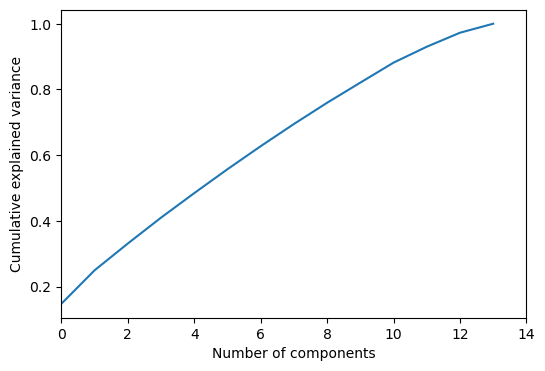

In [79]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment
The above plot shows that almost 90% of variance is explained by the first 12 components.

## Conclusion
-	In this kernel, I have discussed Principal Component Analysis – the most popular dimensionality reduction technique.
-	I have demonstrated PCA implementation with Logistic Regression on the adult dataset.
-	I found the maximum accuracy with the first 12 features and it is found to be 0.8227.
-	As expected, the number of dimensions required to preserve 90 % of variance is found to be 12.
-	Finally, I plot the explained variance ratio with number of dimensions. The graph confirms that approximately 90% of variance is explained by the first 12 components.